In [2]:
#dependencies
#import requests
import pandas as pd
from census import Census
import matplotlib.pyplot as plt

In [3]:
#csv files
#car_prices_csv = "prices_clean.csv"
combined_vehicle_csv= "combined_vehicle_data.csv"

#car_prices_df = pd.read_csv(car_prices_csv)
combined_vehicle_df= pd.read_csv(combined_vehicle_csv)

combined_vehicle_df

,year,make,model,price,VClass
0,2023,Acura,ILX Premium & A-Spec Package,31300,Subcompact Cars
1,2023,Acura,Integra A-Spec Package,33300,Subcompact Cars
2,2023,Acura,Integra A-Spec Tech Package,36300,Subcompact Cars
3,2023,Acura,Integra Base,31300,Subcompact Cars
4,2023,Acura,Integra Manual,35800,Subcompact Cars
...,...,...,...,...,...
1190,2023,Volvo,XC40 Recharge SR FWD,53670,Small Sport Utility Vehicle 2WD
1191,2023,Volvo,XC40 Recharge SR RWD,49780,Small Sport Utility Vehicle 2WD
1192,2023,Volvo,XC60 Recharge,57200,Small Sport Utility Vehicle 2WD
1193,2023,Volvo,XC90 B5 Core,56000,Standard Sport Utility Vehicle 4WD


In [4]:
#find the average price of vehicle per manufactuer 
average_prices_per_make = combined_vehicle_df.groupby("make")["price"].mean().reset_index()

#set float format without scientific notation
pd.options.display.float_format = '{:.2f}'.format

#change column name to average price
column_name_mapping = {
    "price": "average price"}
average_prices_per_make=average_prices_per_make.rename(columns=column_name_mapping)

#put in ascending order by price
average_prices_per_make= average_prices_per_make.sort_values(by="average price", ascending= True)

#average price per manufactuerer lowerst to highest
average_prices_per_make

,make,average price
17,Honda,29285.59
18,Hyundai,30005.43
27,MINI,31355.56
13,Fiat,32254.62
29,Mazda,33343.57
35,Subaru,34387.29
22,KIA,36406.61
7,Buick,36452.42
38,Volkswagen,39357.10
10,Chrysler,44046.55


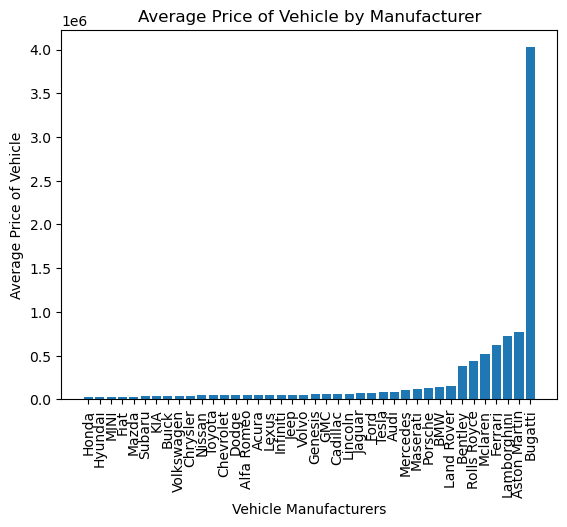

In [5]:
#bar graph of average prices by make of vehicle
categories= average_prices_per_make["make"]
values= average_prices_per_make["average price"]

plt.bar(categories, values)

plt.xlabel("Vehicle Manufacturers")
plt.ylabel("Average Price of Vehicle")
plt.title("Average Price of Vehicle by Manufacturer")

plt.xticks(rotation=90)

plt.show()

In [6]:
#5 cheapest manufactuerers
cheapest_vehicles = average_prices_per_make.sort_values(by="average price").head(5)
cheapest_vehicles

,make,average price
17,Honda,29285.59
18,Hyundai,30005.43
27,MINI,31355.56
13,Fiat,32254.62
29,Mazda,33343.57


In [7]:
#5 most expensive manufactuerers
expensive_vehicles = average_prices_per_make.sort_values(by="average price", ascending=False).head(5)
expensive_vehicles

,make,average price
6,Bugatti,4023333.33
2,Aston Martin,775809.44
23,Lamborghini,719892.60
12,Ferrari,620001.00
30,Mclaren,515548.75


In [10]:
#cheapest and most expensive models per make
#empty dictionaries to store prices
most_expensive_by_make = {}
least_expensive_by_make = {}

#loop through each make of vehicle
unique_makes = combined_vehicle_df['make'].unique()
for make in unique_makes:
    
    make_data = combined_vehicle_df[combined_vehicle_df['make'] == make]
    #find most and lest expensive models per make
    most_expensive = make_data.loc[make_data['price'].idxmax()]
    least_expensive = make_data.loc[make_data['price'].idxmin()]
    
    #put respults in dictionary
    most_expensive_by_make[make]= most_expensive
    least_expensive_by_make[make]= least_expensive
    
print("Most Expensive Vehicles by Make:")
for make, vehicle in most_expensive_by_make.items():
    print(f"{make}: {vehicle['price']} - {vehicle['model']}")

print("\nLeast Expensive Vehicles by Make:")
for make, vehicle in least_expensive_by_make.items():
    print(f"{make}: {vehicle['price']} - {vehicle['model']}")
    

Most Expensive Vehicles by Make:
Acura: 170500 - Nsx Sh-Awd
Alfa Romeo: 87850 - Stelvio Ti AWD
Aston Martin: 3600000 - Valkyrie
Audi: 225000 - R8 V10 GT RWD
Bentley: 2155280 - Bacalar Mulliner
BMW: 750000 - 3.0 CSL Coupe
Bugatti: 5000000 - W16
Buick: 58100 - Enclave Preferred
Cadillac: 152195 - Escalade-V ESV
Chevrolet: 114500 - Corvette Z06 2LZ Coupe
Chrysler: 59990 - Pacifica Pinnacle Plug-in Hybrid
Dodge: 96660 - Challenger SRT Demon 170
Ferrari: 2350000 - Daytona SP3
Fiat: 52500 - 500e
Ford: 1100000 - GT 68 Heritage Edition
Genesis: 98700 - G90 3.5T e-SC
GMC: 186000 - Aion Hyper SSR
Honda: 52030 - Pilot Elite AWD
Hyundai: 64960 - Ioniq 5 LR AWD 77kWh
Infiniti: 87450 - QX80 Sensory AWD
Jaguar: 111200 - F-Type R Convertible
Jeep: 98090 - Grand Wagoneer L Series II Obsidian
KIA: 63000 - EV6 Limited Edition
Lamborghini: 3900000 - Sian Roadster
Land Rover: 408680 - ge Rover 3.0 l Petrol HSE
Lexus: 126290 - LC 500 Edge Limited Edition
Lincoln: 112300 - Navigator L Black Label
Maserati: 2

In [16]:
#find the average price of vehicle per class of car 
average_prices_per_class = combined_vehicle_df.groupby("VClass")["price"].mean().reset_index()

#change column name to average price
column_name_mapping = {
    "price": "average price"}
average_prices_per_class=average_prices_per_class.rename(columns=column_name_mapping)

#put in ascending order by price
average_prices_per_class= average_prices_per_class.sort_values(by="average price", ascending= True)

#average price per class of car lowest to highest
average_prices_per_class

,VClass,average price
0,Compact Cars,33094.09
11,Small Sport Utility Vehicle 2WD,42338.21
9,Small Pick,43250.00
10,Small Pickup Trucks,43883.33
19,Van,47953.33
12,Small Sport Utility Vehicle 4WD,49308.66
8,Minivan - 4WD,49420.00
7,Minivan - 2WD,49850.00
14,Small Wagons,50805.00
13,Small Station Wagons,55195.38


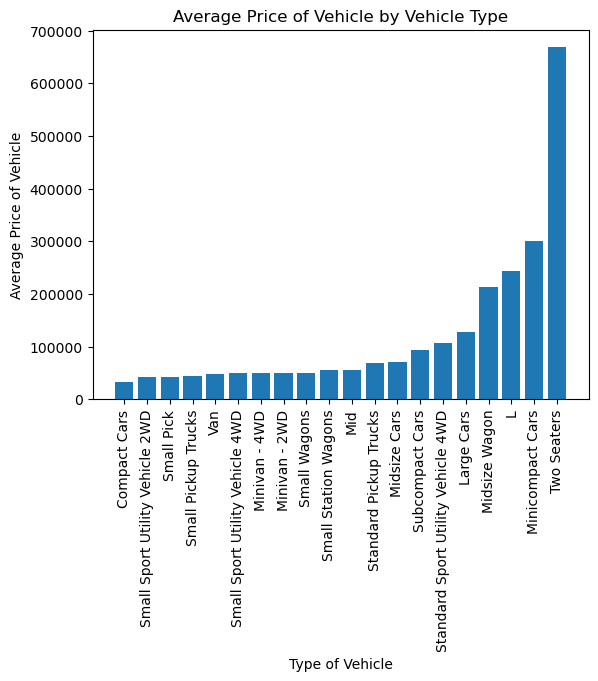

In [18]:
#bar graph of average prices by class of vehicle
categories= average_prices_per_class["VClass"]
values= average_prices_per_class["average price"]

plt.bar(categories, values)

plt.xlabel("Type of Vehicle")
plt.ylabel("Average Price of Vehicle")
plt.title("Average Price of Vehicle by Vehicle Type")

plt.xticks(rotation=90)

plt.show()

In [19]:
#find the average price of vehicle per class of car  by manufacturer
average_prices_per_class_make = combined_vehicle_df.groupby(["VClass", "make"])["price"].mean().reset_index()
average_prices_per_class_make

,VClass,make,price
0,Compact Cars,Acura,50781.67
1,Compact Cars,BMW,45550.00
2,Compact Cars,Cadillac,46074.17
3,Compact Cars,Hyundai,15414.44
4,Compact Cars,KIA,17490.00
...,...,...,...
177,Two Seaters,Nissan,72808.33
178,Two Seaters,Porsche,109800.00
179,Two Seaters,Toyota,55750.00
180,Van,Ford,51996.00


In [22]:
#cheapest and most expensive models by car type
#empty dictionaries to store prices
most_expensive_by_type = {}
least_expensive_by_type = {}

#loop through each make and class of vehicle
unique_makes_types = average_prices_per_class_make.groupby(['make', 'VClass'])
for (make, VClass), group in unique_makes_types:
    
    #find most and lest expensive models per make and class
    most_expensive_type = group.loc[group['price'].idxmax()]
    least_expensive_type = group.loc[group['price'].idxmin()]
    
    #put results in dictionary
    most_expensive_by_type[make, VClass]= most_expensive
    least_expensive_by_type[make, VClass]= least_expensive
    
print("Most Expensive Vehicles by Make and Type:")
for (make, VClass), vehicle in most_expensive_by_type.items():
    print(f"Make: {make}, Type: {VClass}, Price: {vehicle['price']}")

print("\nLeast Expensive Vehicles by Make and Type:")
for (make, VClass), vehicle in least_expensive_by_type.items():
    print(f"Make: {make}, Type: {VClass}, Price: {vehicle['price']}")

Most Expensive Vehicles by Make and Type:
Make: Acura, Type: Compact Cars, Price: 113940
Make: Acura, Type: Small Sport Utility Vehicle 4WD, Price: 113940
Make: Acura, Type: Standard Sport Utility Vehicle 4WD, Price: 113940
Make: Acura, Type: Subcompact Cars, Price: 113940
Make: Alfa Romeo, Type: Midsize Cars, Price: 113940
Make: Alfa Romeo, Type: Small Sport Utility Vehicle 2WD, Price: 113940
Make: Alfa Romeo, Type: Small Sport Utility Vehicle 4WD, Price: 113940
Make: Aston Martin, Type: Minicompact Cars, Price: 113940
Make: Aston Martin, Type: Small Sport Utility Vehicle 4WD, Price: 113940
Make: Aston Martin, Type: Standard Sport Utility Vehicle 4WD, Price: 113940
Make: Aston Martin, Type: Two Seaters, Price: 113940
Make: Audi, Type: Midsize Cars, Price: 113940
Make: Audi, Type: Midsize Wagon, Price: 113940
Make: Audi, Type: Small Sport Utility Vehicle 4WD, Price: 113940
Make: Audi, Type: Small Wagons, Price: 113940
Make: Audi, Type: Standard Sport Utility Vehicle 4WD, Price: 113940
